In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import KFold
import itertools
import numpy as np
import seaborn as sb
import pickle

In [2]:
# Importing dataset using pandas into Data Frame
df = pd.read_csv("fake_or_real_news.csv")

In [3]:
# Getting shape of the extracted data frame
df.shape

(6335, 4)

In [4]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


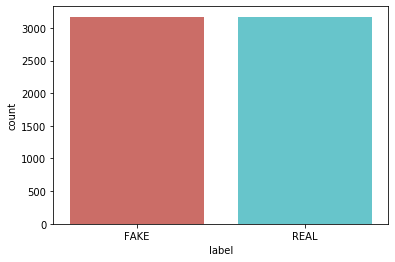

In [5]:
# Distribution of classes for prediction
def create_distribution(dataFile):
    return sb.countplot(x="label",data=dataFile,palette="hls")

# Calling below method to check that data is evenly distributed or not
create_distribution(df)

In [6]:
def data_qualityCheck():
    print("\nChecking data quality")
    print(df.isnull().sum())
    print(df.info())
    print("\nCheck Finished...!!!")
data_qualityCheck()


Checking data quality
Unnamed: 0    0
title         0
text          0
label         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB
None

Check Finished...!!!


In [7]:
# Seperate Labels and setting up training and testing dataset

y = df.label
y.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [8]:
# Drop Label column
df.drop("label",axis=1)

,Unnamed: 0,title,text
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello..."
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T..."
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...
...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene..."


In [9]:
# Making training and testing data set

# Spliting dataset

x_train,x_test,y_train,y_test = train_test_split(df["text"],y,test_size=0.33,random_state=100)

In [10]:
x_train.head()

1698    Waking Times \n“If the matrix gives you Trumpo...
3675    Washington (CNN) In an awkward meeting at the ...
3834    October 27, 2016 -  By Eduard Popov for Fort R...
1684    Two Systems of Justice In America: One for the...
2716    On To Indy: Hoosier State Could Be Stand For T...
Name: text, dtype: object

In [11]:
x_test.head()

5438    Posted on October 30, 2016 by DavidSwanson \nP...
2071    By Mike Maharrey Voters in Florida have approv...
1383    On The Streets Of Baltimore, Trying To Underst...
5608    Trump Rally On Hollywood Boulevard 10/29/16 Us...
3905    Monday 14 November 2016 by Benedict Farkerhaus...
Name: text, dtype: object

In [12]:
# Feature Extraction--Reducing mass of unstructured data into some uniform set of attributes that an algorithm can understand.
# For fake news detection it can be word counts(bag of words)

# Starting with bag of words technique
# Creating feature vector - document term matrix
# Initialize counter_vectorizer

counter_vectorizer = CountVectorizer(stop_words="english")
counter_vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [13]:
# Fit and transform training data
# Learn the vocabulary dictornary and return term-document matrix

count_train = counter_vectorizer.fit_transform(x_train)
print(count_train)

  (0, 54521)	5
  (0, 50836)	5
  (0, 31626)	2
  (0, 21679)	2
  (0, 51862)	3
  (0, 53433)	2
  (0, 44983)	1
  (0, 3036)	1
  (0, 31909)	2
  (0, 12556)	2
  (0, 45724)	1
  (0, 51863)	1
  (0, 29560)	1
  (0, 43280)	1
  (0, 7826)	1
  (0, 37609)	10
  (0, 4597)	1
  (0, 8975)	1
  (0, 27741)	2
  (0, 2341)	1
  (0, 32301)	1
  (0, 24068)	2
  (0, 31162)	1
  (0, 40124)	3
  (0, 21455)	3
  :	:
  (4243, 52285)	1
  (4243, 49115)	1
  (4243, 10510)	1
  (4243, 48177)	1
  (4243, 15985)	1
  (4243, 54937)	1
  (4243, 13570)	1
  (4243, 3633)	2
  (4243, 19268)	1
  (4243, 32436)	1
  (4243, 53958)	1
  (4243, 7242)	1
  (4243, 38068)	1
  (4243, 44807)	1
  (4243, 27610)	1
  (4243, 44438)	1
  (4243, 37343)	2
  (4243, 5339)	2
  (4243, 51905)	1
  (4243, 24577)	2
  (4243, 45284)	1
  (4243, 28697)	1
  (4243, 23830)	1
  (4243, 49635)	4
  (4243, 20890)	1


In [14]:
# Print training doc term matrix
# We have matrix size of (4434,58197) by calling below method

def get_counterVectorizer_stats():
    # Vocab size
    print(count_train.shape)
    # Vocabulary check
    #Printing the identified Unique words along with their indices
    print(counter_vectorizer.vocabulary_)
    
get_counterVectorizer_stats()

(4244, 56916)
{'waking': 54521, 'times': 50836, 'matrix': 31626, 'gives': 21679, 'trumpocalypse': 51862, 'use': 53433, 'secret': 44983, 'alchemical': 3036, 'means': 31909, 'create': 12556, 'shifting': 45724, 'trumpocalyptic': 51863, 'lemonade': 29560, 'rob': 43280, 'brezsny': 7826, 'people': 37609, 'asked': 4597, 'carl': 8975, 'jung': 27741, 'actually': 2341, 'met': 32301, 'hitler': 24068, 'manipulated': 31162, 'psyche': 40124, 'german': 21455, 'replied': 42366, 'didn': 14805, 'manipulate': 31161, 'mark': 31359, 'twain': 52098, 'said': 44001, 'history': 24053, 'does': 15726, 'repeat': 42323, 'rhymes': 42988, 'wondering': 55615, 'racist': 40746, 'xenophobic': 55936, 'authoritarian': 5049, 'climate': 10458, 'science': 44685, 'denying': 14231, 'misogynistic': 32890, 'grab': 22099, 'pussy': 40386, 'candidate': 8752, 'way': 54797, 'presidency': 39419, 'look': 30304, 'mirror': 32780, 'far': 19004, 'long': 30284, 'given': 21676, 'idea': 24986, 'authority': 5054, 'save': 44384, 'delusion': 140

In [15]:
# Transform the test set

count_test = counter_vectorizer.transform(x_test)
count_test.shape

(2091, 56916)

In [16]:
# Creating TF-IDF Frequency Feature
# Initializing the "tfidf_vectorizer"
# This removes words which appear for more than 70% in the article

tfidf_vectorizer = TfidfVectorizer(stop_words="english",max_df=0.7)

In [17]:
# Fit and transform training data

tfidf_train = tfidf_vectorizer.fit_transform(x_train)

In [18]:
def get_tfidf_stats():
    print(tfidf_train.shape)
    # Getting matrix
    print(tfidf_train.A[:10])
    
get_tfidf_stats()

(4244, 56916)
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.08905582 0.         ... 0.         0.         0.        ]]


In [19]:
# Transform Test set
tfidf_test = tfidf_vectorizer.transform(x_test)

In [20]:
# Get feature name of 'tfidf_vectorizer'

print(tfidf_vectorizer.get_feature_names()[:10])

['00', '000', '0000', '000000031', '00000031', '00006', '000billion', '000ft', '000x', '001']


In [21]:
# Get feature name of 'counter_vectorizer'

print(counter_vectorizer.get_feature_names()[:10])

['00', '000', '0000', '000000031', '00000031', '00006', '000billion', '000ft', '000x', '001']


In [22]:
# Check is performed whether two vectorizer have extracted same features or not

count_df = pd.DataFrame(count_train.A , columns = counter_vectorizer.get_feature_names())
tfidf_df = pd.DataFrame(tfidf_train.A , columns = tfidf_vectorizer.get_feature_names())
difference = set(count_df.columns) - set(tfidf_df.columns)
print(difference)

set()


In [23]:
# Check whether Data Frames are equal or not
print(count_df.equals(tfidf_df))

False


In [24]:
print(count_df.head())

   00  000  0000  000000031  00000031  00006  000billion  000ft  000x  001  \
0   0    0     0          0         0      0           0      0     0    0   
1   0    0     0          0         0      0           0      0     0    0   
2   0    0     0          0         0      0           0      0     0    0   
3   0    0     0          0         0      0           0      0     0    0   
4   0    0     0          0         0      0           0      0     0    0   

   ...  حلب  عربي  عن  لم  ما  محاولات  من  هذا  والمرضى  ยงade  
0  ...    0     0   0   0   0        0   0    0        0      0  
1  ...    0     0   0   0   0        0   0    0        0      0  
2  ...    0     0   0   0   0        0   0    0        0      0  
3  ...    0     0   0   0   0        0   0    0        0      0  
4  ...    0     0   0   0   0        0   0    0        0      0  

[5 rows x 56916 columns]


In [25]:
print(tfidf_df.head())

    00  000  0000  000000031  00000031  00006  000billion  000ft  000x  001  \
0  0.0  0.0   0.0        0.0       0.0    0.0         0.0    0.0   0.0  0.0   
1  0.0  0.0   0.0        0.0       0.0    0.0         0.0    0.0   0.0  0.0   
2  0.0  0.0   0.0        0.0       0.0    0.0         0.0    0.0   0.0  0.0   
3  0.0  0.0   0.0        0.0       0.0    0.0         0.0    0.0   0.0  0.0   
4  0.0  0.0   0.0        0.0       0.0    0.0         0.0    0.0   0.0  0.0   

   ...  حلب  عربي   عن   لم   ما  محاولات   من  هذا  والمرضى  ยงade  
0  ...  0.0   0.0  0.0  0.0  0.0      0.0  0.0  0.0      0.0    0.0  
1  ...  0.0   0.0  0.0  0.0  0.0      0.0  0.0  0.0      0.0    0.0  
2  ...  0.0   0.0  0.0  0.0  0.0      0.0  0.0  0.0      0.0    0.0  
3  ...  0.0   0.0  0.0  0.0  0.0      0.0  0.0  0.0      0.0    0.0  
4  ...  0.0   0.0  0.0  0.0  0.0      0.0  0.0  0.0      0.0    0.0  

[5 rows x 56916 columns]


In [26]:
# Function to plot confusion matrix
# Normalization can be applied by setting 'normalize=True'

def plot_confusion_matrix(cm,classes,normalize=False,title="Confusion Matrix",cmap=plt.cm.Blues):
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix without Normalization")
        
    thresh = cm.max() / 2
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],horizontalalignment="center",color="white" if cm[i,j]>thresh else "black")
        
    plt.tight_layout()
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")

In [27]:
# building classifer using naive bayes
# Naive Bayes classifer for Multinomial model

nb_pipeline = Pipeline([('NBTV',tfidf_vectorizer),('nb_clf',MultinomialNB())],verbose=True)

In [28]:
# Fit Naive Bayes classifier to x and y

nb_pipeline.fit(x_train,y_train)

[Pipeline] .............. (step 1 of 2) Processing NBTV, total=   4.2s
[Pipeline] ............ (step 2 of 2) Processing nb_clf, total=   0.0s


Pipeline(memory=None,
         steps=[('NBTV',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.7, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('nb_clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=True)

In [29]:
# Perform classification on an array of test vector x
predicted_nbt = nb_pipeline.predict(x_test)

In [30]:
score = metrics.accuracy_score(y_test,predicted_nbt)
print(f"Accuracy:{round(score*100,2)}%")

Accuracy:85.22%


Confusion Matrix without Normalization


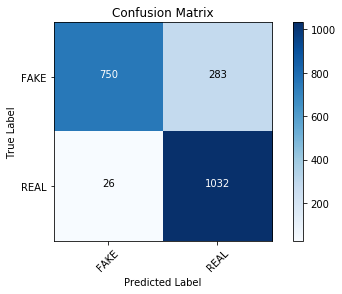

In [31]:
cm = metrics.confusion_matrix(y_test,predicted_nbt,labels=['FAKE','REAL'])
plot_confusion_matrix(cm,classes=['FAKE','REAL'])

In [32]:
print(cm)

[[ 750  283]
 [  26 1032]]


In [33]:
nbc_pipeline = Pipeline([('NBCV',counter_vectorizer),('nb_clf',MultinomialNB())])
nbc_pipeline.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('NBCV',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words='english', strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('nb_clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [34]:
predicted_nbc = nbc_pipeline.predict(x_test)
score = metrics.accuracy_score(y_test,predicted_nbc)
print(f'Accuracy:{round(score*100,2)}%')

Accuracy:89.05%


Confusion Matrix without Normalization


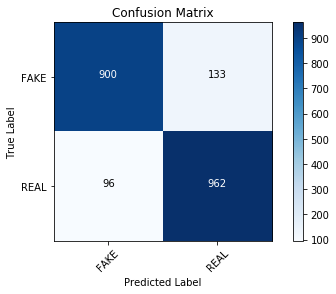

In [35]:
cm1 = metrics.confusion_matrix(y_test,predicted_nbc,labels=['FAKE','REAL'])
plot_confusion_matrix(cm1,classes=['FAKE','REAL'])

In [36]:
print(cm1)

[[900 133]
 [ 96 962]]


In [37]:
print(metrics.classification_report(y_test,predicted_nbt))

              precision    recall  f1-score   support

        FAKE       0.97      0.73      0.83      1033
        REAL       0.78      0.98      0.87      1058

    accuracy                           0.85      2091
   macro avg       0.88      0.85      0.85      2091
weighted avg       0.87      0.85      0.85      2091



In [38]:
print(metrics.classification_report(y_test,predicted_nbc))

              precision    recall  f1-score   support

        FAKE       0.90      0.87      0.89      1033
        REAL       0.88      0.91      0.89      1058

    accuracy                           0.89      2091
   macro avg       0.89      0.89      0.89      2091
weighted avg       0.89      0.89      0.89      2091



In [39]:
# building Passive Aggressive Classifier
# Applying Passive Aggressive Classifier

# Initialize Passive Aggressive Classifier

linear_clf = Pipeline([('linear',tfidf_vectorizer),('pa_clf',PassiveAggressiveClassifier(max_iter=50))])
linear_clf.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('linear',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.7, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('pa_clf',
                 PassiveAggressiveClassifier(C=1.0, average=False,
                                             class_weight=None,
       

In [40]:
# Predict on test set and calculating accuracy

pred = linear_clf.predict(x_test)
score = metrics.accuracy_score(y_test,pred)
print(f'Accuracy:{round(score*100,2)}%')

Accuracy:93.59%


Confusion Matrix without Normalization


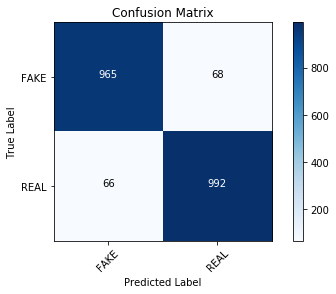

In [41]:
# Build Confusion Matrix
cm = metrics.confusion_matrix(y_test,pred,labels=['FAKE','REAL'])
plot_confusion_matrix(cm,classes=['FAKE','REAL'])

In [42]:
print(cm)

[[965  68]
 [ 66 992]]


In [43]:
print(metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

        FAKE       0.94      0.93      0.94      1033
        REAL       0.94      0.94      0.94      1058

    accuracy                           0.94      2091
   macro avg       0.94      0.94      0.94      2091
weighted avg       0.94      0.94      0.94      2091



In [44]:
hello_clf = Pipeline([('count_clf',counter_vectorizer),('pas_clf',PassiveAggressiveClassifier(max_iter=50))])
hello_clf.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('count_clf',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words='english', strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('pas_clf',
                 PassiveAggressiveClassifier(C=1.0, average=False,
                                             class_weight=None,
                                             early_stopping=False,
                                             fit_intercept=True, loss='hinge',
                    

In [45]:
predict_clf = hello_clf.predict(x_test)
score_1 = metrics.accuracy_score(y_test,predict_clf)
score_1

0.8981348637015782

Confusion Matrix without Normalization


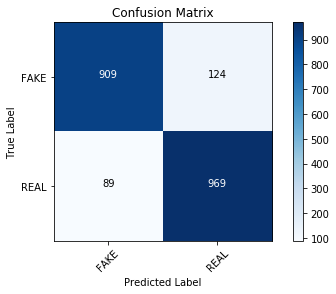

In [46]:
cm2 = metrics.confusion_matrix(y_test,predict_clf,labels=['FAKE','REAL'])
plot_confusion_matrix(cm2,classes=['FAKE','REAL'])

In [47]:
# saving best model to disk

'''model_file = 'final_model.sav'
pickle.dump(linear_clf,open(model_file,'wb'))'''

"model_file = 'final_model.sav'\npickle.dump(linear_clf,open(model_file,'wb'))"

In [48]:
'''import pickle
var = input("Please Enter News Text you want to verify:")

# function to run for prediction
def detecting_fake_news(var):
    # retriving the best model for prediction call
    load_model = pickle.load(open("final_model.sav",'rb'))
    prediction = load_model.predict([var])
    
    return (print("\n\nThe Given News is:",prediction[0]))

if __name__ == '__main__':
    detecting_fake_news(var)'''

'import pickle\nvar = input("Please Enter News Text you want to verify:")\n\n# function to run for prediction\ndef detecting_fake_news(var):\n    # retriving the best model for prediction call\n    load_model = pickle.load(open("final_model.sav",\'rb\'))\n    prediction = load_model.predict([var])\n    \n    return (print("\n\nThe Given News is:",prediction[0]))\n\nif __name__ == \'__main__\':\n    detecting_fake_news(var)'